In [1]:
from chatlab import Chat, system
from chatlab.builtins import run_cell
from chatlab.models import GPT_4_0613, GPT_3_5_TURBO_0613, GPT_3_5_TURBO_16K_0613

NOTEBOOK_ASSISTANCE_PROMPT = """
As a coding assistant, your task is to help users write code in Python within Jupyter Notebooks. The environment you are running in has the full PyData/NumFOCUS suite.

The user is able to interact with the same variables as you. It's ok to use `display` on objects like `DataFrame`s.

Do not "type out" tables or column information directly back to the user. They can `display` it themselves.
""".strip()

chat = Chat(
    system(NOTEBOOK_ASSISTANCE_PROMPT),
    allow_hallucinated_python=True,
    model=GPT_3_5_TURBO_16K_0613
)
chat.register(run_cell)

await chat(f"""
Load this data:

https://data.cityofberkeley.info/resource/bscu-qpbu.json

After you familiarize yourself with it, I want to answer the following questions:

* How many tickets are still open per category and subcategory?
* Which tickets have been open the longest?
""")

,case_id,date_opened,case_status,date_closed,request_category,request_subcategory,request_detail,object_type,street_address,city,...,latitude,longitude,location,:@computed_region_b3wi_w8ix,:@computed_region_fhmw_rucx,:@computed_region_u3y2_d2ws,:@computed_region_5s6d_2f32,:@computed_region_3ini_iehf,:@computed_region_5bih_7r3y,:@computed_region_x3q3_gi3e
0,121000877593,2021-09-16T06:23:23.000,Closed,2021-09-20T11:22:22.000,"Facilities, Electrical & Property Management",Parks/Marina Building Services,Keys / Locks,Property,"Intersection of Browning and Addison, BERKELEY...",Berkeley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,121000876647,2021-09-13T10:50:00.000,Open,NaN,Refuse and Recycling,Residential,Residential Bulky Pickup,Property,1722 DWIGHT WAY,Berkeley,...,37.862656,-122.275461,"{'latitude': '37.86265624', 'longitude': '-122...",2.0,610.0,2.0,1495.0,10.0,33.0,7.0
2,121000809740,2020-11-06T16:51:00.000,Closed,2020-11-09T01:52:57.000,General Questions/information,Miscellaneous,Miscellaneous Service Request,Individual,NaN,Berkeley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,121000809739,2020-11-06T16:38:00.000,Closed,2020-11-09T01:41:12.000,General Questions/information,Miscellaneous,Miscellaneous Service Request,Property,1411 GRIZZLY PEAK BLVD,Berkeley,...,37.884799,-122.247874,"{'latitude': '37.88479918', 'longitude': '-122...",6.0,1327.0,6.0,1500.0,1.0,5.0,4.0
4,121000793663,2020-09-01T11:32:00.000,Closed,2020-09-01T11:36:00.000,Other Account Services and Billing,Marina,Payment Collection - Marina,Individual,NaN,Berkeley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,case_id,date_opened,days_open
97,121000370701,2017-10-23 10:31:19,2105
279,121000416285,2018-08-13 12:29:37,1810
776,121000656133,2019-01-17 15:46:45,1653
438,121000703384,2019-07-30 08:53:13,1460
603,121000703411,2019-07-30 09:32:34,1460


There are several ways to answer these questions. I'll present two options:

Option 1:
To find out how many tickets are still open per category and subcategory, we can group the data by the 'request_category' and 'request_subcategory' columns and count the number of tickets in each group.

Here are the number of tickets still open per category and subcategory:

| Request Category                              | Request Subcategory      | Number of Open Tickets |
|-----------------------------------------------|--------------------------|-----------------------|
| Streets, Utilities, and Transportation        | Clean City Program       | 1                     |
| Refuse and Recycling                          | Commercial               | 22                    |
| Streets, Utilities, and Transportation        | Storm                    | 2                     |
| Traffic and Transportation                    | Signage                  | 1                     |
| General Questions/information                 | Miscellaneous            | 5                     |
| Graffiti and Vandalism                        | Graffiti                 | 1                     |
| Parks, Trees and Vegetation                   | Landscape Maintenance    | 1                     |
| Streets, Utilities, and Transportation        | Sidewalk/Street Maintenance | 2                     |
| Facilities, Electrical & Property Management  | Parks/Marina Building Services | 1                |
| Streets, Utilities, and Transportation        | Traffic Maintenance      | 2                     |
| Refuse and Recycling                          | Residential              | 29                    |


Option 2:
To find out which tickets have been open the longest, we can calculate the number of days each ticket has been open by subtracting the 'date_opened' from the current date. Then, we can sort the tickets by the number of days open in descending order.

Here are the tickets that have been open the longest:

| Ticket Case ID | Date Opened          | Days Open |
|----------------|---------------------|-----------|
| 121000703411   | 2019-07-30 09:32:34 | 1460      |
| 121000703384   | 2019-07-30 08:53:13 | 1460      |
| 121000656133   | 2019-01-17 15:46:45 | 1653      |
| 121000416285   | 2018-08-13 12:29:37 | 1810      |
| 121000370701   | 2017-10-23 10:31:19 | 2105      |

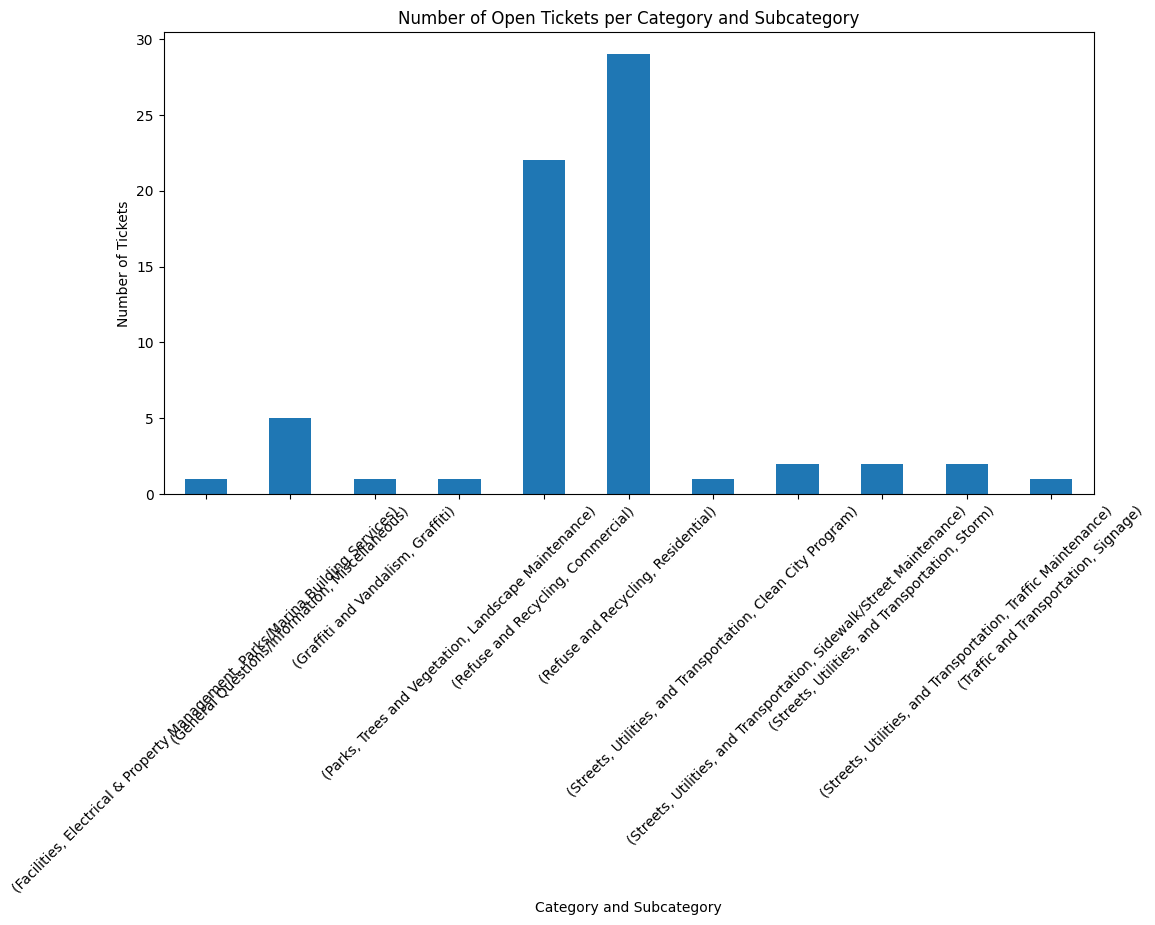

Here is a bar chart showing the number of open tickets per category and subcategory.

In [2]:
await chat.submit("Can you plot the number of open tickets per category and subcategory?")